In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import hashlib
import glob

# Create reviews

In [2]:
from src.ask import analyseText
from src.dbkg import consolidateBits

In [3]:
with open("doc/WIP/clement_v2.md","r") as f:
    t = f.read()
t = ["## "+x.strip() for x in t.split("##") if len(x.strip())]

In [4]:
allDFs = []
for te in t:
    DD = analyseText( te, TypeOfItem="Activities", PBN=False, Source="Clement_v2", Place="Grenoble_Batch2", Reviewed=False, MIN=10, ow=False, seed="..", MODEL="gpt-3.5-turbo" )
    allDFs.append(DD)
pd.concat(allDFs).reset_index(drop=True)

Processing with gpt-3.5-turbo :	 05/05/2024, 17:22:13 --> 05/05/2024, 17:22:14
Adding another layer, len(df)= 4
Processing with gpt-3.5-turbo :	 05/05/2024, 17:22:20 --> 05/05/2024, 17:22:21
Processing with gpt-3.5-turbo :	 05/05/2024, 17:22:21 --> 05/05/2024, 17:22:22
Processing with gpt-3.5-turbo :	 05/05/2024, 17:22:22 --> 05/05/2024, 17:22:23
Processing with gpt-3.5-turbo :	 05/05/2024, 17:22:23 --> 05/05/2024, 17:22:24
Not save excel, length 4
Adding another layer now, len(NEW/df)= 4 / 8 seed: ..
Adding another layer, len(df)= 8
Not save excel, length 4
Adding another layer now, len(NEW/df)= 4 / 12 seed: ..
Save excel --v2, length 12
Adding another layer, len(df)= 3
Processing with gpt-3.5-turbo :	 05/05/2024, 17:22:35 --> 05/05/2024, 17:22:36
Processing with gpt-3.5-turbo :	 05/05/2024, 17:22:36 --> 05/05/2024, 17:22:37
Processing with gpt-3.5-turbo :	 05/05/2024, 17:22:37 --> 05/05/2024, 17:22:38
Processing with gpt-3.5-turbo :	 05/05/2024, 17:22:38 --> 05/05/2024, 17:22:38
Proc

,FromProbono,Origin,Place,Type,Source,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,False,Clement_v2,EU,Activities,## Bringing sustainable urban planning down to...,The text emphasizes the potential for sustaina...,Attractiveness,"Governance, empowerment and engagement",Neighbourhood,5,Sustainable urban planning through agriculture.,Sustainability and food in urban planning.,False
1,False,Clement_v2,EU,Activities,## Bringing sustainable urban planning down to...,The text discusses the importance of integrati...,Preservation and improvement of environment,Biodiversity and ecosystem services,Building,4,Integrating agriculture into urban planning.,Sustainability and food in urban planning.,False
2,False,Clement_v2,EU,Activities,## Bringing sustainable urban planning down to...,The text highlights the need for urban plannin...,Resilience,Safety and security,Neighbourhood,3,Urban planning for community well-being.,Sustainability and food in urban planning.,False
3,False,Clement_v2,EU,Activities,## Bringing sustainable urban planning down to...,By reevaluating processes of urban manufacture...,Responsible resource use,Economy and sustainable production and consump...,Building,4,Sustainable urban planning for communities.,Sustainability and food in urban planning.,False
4,False,Clement_v2,EU,Activities,## Bringing sustainable urban planning down to...,The text emphasizes the importance of engaging...,Social cohesion,"Living together, interdependence and mutuality",Building,5,Importance of community in planning.,Sustainability and food in urban planning.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,False,Clement_v2,Grenoble_Batch2,Activities,## Energie partatgée – Energy community\nÉnerg...,"The mention of citizen involvement, local auth...",Social cohesion,"Innovation, creativity and research",Neighbourhood,4,"Collaborative, community-driven energy managem...",Renewable energy project in Grenoble.,False
243,False,Clement_v2,Grenoble_Batch2,Activities,## Energie partatgée – Energy community\nÉnerg...,The installation of photovoltaic solar panels ...,Responsible resource use,Biodiversity and ecosystem services,Building,3,Solar panels support renewable energy.,Renewable energy project in Grenoble.,False
244,False,Clement_v2,Grenoble_Batch2,Activities,## Energie partatgée – Energy community\nÉnerg...,The text focuses on the development of energy ...,Preservation and improvement of environment,Community smart infrastructures,Building,5,Energy community solar projects in Grenoble,Renewable energy project in Grenoble.,False
245,False,Clement_v2,Grenoble_Batch2,Activities,## Energie partatgée – Energy community\nÉnerg...,"The mention of citizen involvement, local auth...",Social cohesion,"Innovation, creativity and research",Neighbourhood,4,"Collaborative, community-driven energy managem...",Renewable energy project in Grenoble.,False


# Consolidate excels

In [13]:
df = consolidateBits(PATH="./data/xls/")
print(len(df),"reviews")

1981 reviews


In [20]:
from src.reportmgr import createExcel

In [21]:
df["ID"] = df.Source.apply(lambda x: str(hashlib.md5(x.encode("utf-8")).hexdigest()))

/tmp/ipykernel_34590/1871354911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ID"] = df.Source.apply(lambda x: str(hashlib.md5(x.encode("utf-8")).hexdigest()))


In [22]:
df = df[df.Place == "Grenoble_Batch2"] # Grenoble_Batch2
df

,FromProbono,Origin,Place,Type,Source,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed,ID
192,False,Clement_v2,Grenoble_Batch2,Activities,## AMUST-A-Lab co-design methodology\n\nWelcom...,The text highlights the involvement of differe...,Social cohesion,"Governance, empowerment and engagement",Building,4,Stakeholder involvement in integration policies.,Migrants integration through co-design methodo...,False,745199c62f3856515321c503a3c97896
193,False,Clement_v2,Grenoble_Batch2,Activities,## AMUST-A-Lab co-design methodology\n\nWelcom...,Specific educational and housing programs are ...,Social cohesion,Education and capacity building,Neighbourhood,3,Programs for young people.,Migrants integration through co-design methodo...,False,745199c62f3856515321c503a3c97896
194,False,Clement_v2,Grenoble_Batch2,Activities,## AMUST-A-Lab co-design methodology\n\nWelcom...,The efforts towards welcoming and integrating ...,Well-being,Health and care in the community,Building,4,Efforts to support migrants' well-being.,Migrants integration through co-design methodo...,False,745199c62f3856515321c503a3c97896
195,False,Clement_v2,Grenoble_Batch2,Activities,## AMUST-A-Lab co-design methodology\n\nWelcom...,The creation of a permanent participatory pane...,Social cohesion,Culture and community identity,Neighbourhood,3,Initiatives to support migrants' integration.,Migrants integration through co-design methodo...,False,745199c62f3856515321c503a3c97896
196,False,Clement_v2,Grenoble_Batch2,Activities,## AMUST-A-Lab co-design methodology\n\nWelcom...,The focus on evaluating and updating programs ...,Resilience,Safety and security,Neighbourhood,3,Enhancing migrant reception and safety.,Migrants integration through co-design methodo...,False,745199c62f3856515321c503a3c97896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,False,Clement_v2,Grenoble_Batch2,Activities,## ECOLE\nIndustrial Parks suffer from an imag...,The text focuses on the implementation of a ci...,Responsible resource use,"Innovation, creativity and research",Neighbourhood,4,Circular economy in industrial parks.,Accelerating transition to circular industry.,False,1400e2a9f80419579c0f1b668020205b
1906,False,Clement_v2,Grenoble_Batch2,Activities,## ECOLE\nIndustrial Parks suffer from an imag...,The project aims to transform industrial parks...,Preservation and improvement of environment,Biodiversity and ecosystem services,Neighbourhood,3,Transforming industrial parks for sustainability.,Accelerating transition to circular industry.,False,1400e2a9f80419579c0f1b668020205b
1907,False,Clement_v2,Grenoble_Batch2,Activities,## ECOLE\nIndustrial Parks suffer from an imag...,The project focuses on enhancing the resilienc...,Resilience,Safety and security,Neighbourhood,3,Enhancing resilience of industrial parks.,Accelerating transition to circular industry.,False,1400e2a9f80419579c0f1b668020205b
1908,False,Clement_v2,Grenoble_Batch2,Activities,## ECOLE\nIndustrial Parks suffer from an imag...,While the main focus is on industrial parks an...,Well-being,Health and care in the community,Neighbourhood,2,Circular industrial parks benefit community he...,Accelerating transition to circular industry.,False,1400e2a9f80419579c0f1b668020205b


In [23]:
createExcel(df,"doc/WIP/clement.xlsx","Texts from Clement","EU","Review of EU projects")

/home/kelu/projets/pariso37k/venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


'doc/WIP/clement.xlsx'

# Creating visuals

In [24]:
import src.img as iImg
df = pd.read_parquet("data/xls/db.parquet.gzip")
items = df.Source.unique()
print(len(items))
df

554


,FromProbono,Origin,Place,Type,Source,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The text emphasizes the promotion of social co...,Social cohesion,Economy and sustainable production and consump...,Building,4,Promoting social cohesion through solidarity p...,Social project creating inclusive spaces.,False
1,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The project aims to create spaces for social i...,Social cohesion,Culture and community identity,Building,3,Create spaces for community interactions.,Social project creating inclusive spaces.,False
2,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The initiatives outlined in the project focus ...,Social cohesion,"Living together, interdependence and mutuality",Building,3,Community project promotes solidarity and incl...,Social project creating inclusive spaces.,False
3,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The text highlights the involvement of the loc...,Attractiveness,"Governance, empowerment and engagement",Building,4,Involvement of community in decision-making.,Coworking space in former station.,False
4,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The project aims to foster social cohesion by ...,Social cohesion,"Innovation, creativity and research",Neighbourhood,3,Promoting innovation in local community,Coworking space in former station.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The text describes a project aimed at restorin...,Preservation and improvement of environment,Living and working environment,Building,4,Restoring two fountains in Louvre-Opéra.,Restore iconic Parisian fountains elegantly.,False
1977,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the iconic bronze fountains...,Social cohesion,Culture and community identity,Neighbourhood,3,Restoration of iconic bronze fountains.,Restore iconic Parisian fountains elegantly.,False
1978,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the fountains and the impro...,Well-being,Health and care in the community,Building,2,Improving fountains benefits community well-being,Restore iconic Parisian fountains elegantly.,False
1979,False,BudgetParis,Paris,Activities,Le projet consiste à équiper des classes de 6 ...,The introduction of digital tools in elementar...,Attractiveness,"Innovation, creativity and research",Building,1,Digital tools improve elementary education.,Equipping schools with digital tools.,False


In [27]:
df.Place.unique()

array(['Paris', 'EU', 'Grenoble_Batch2'], dtype=object)

/home/kelu/projets/pariso37k/src/img.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/home/kelu/projets/pariso37k/src/img.py:105: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


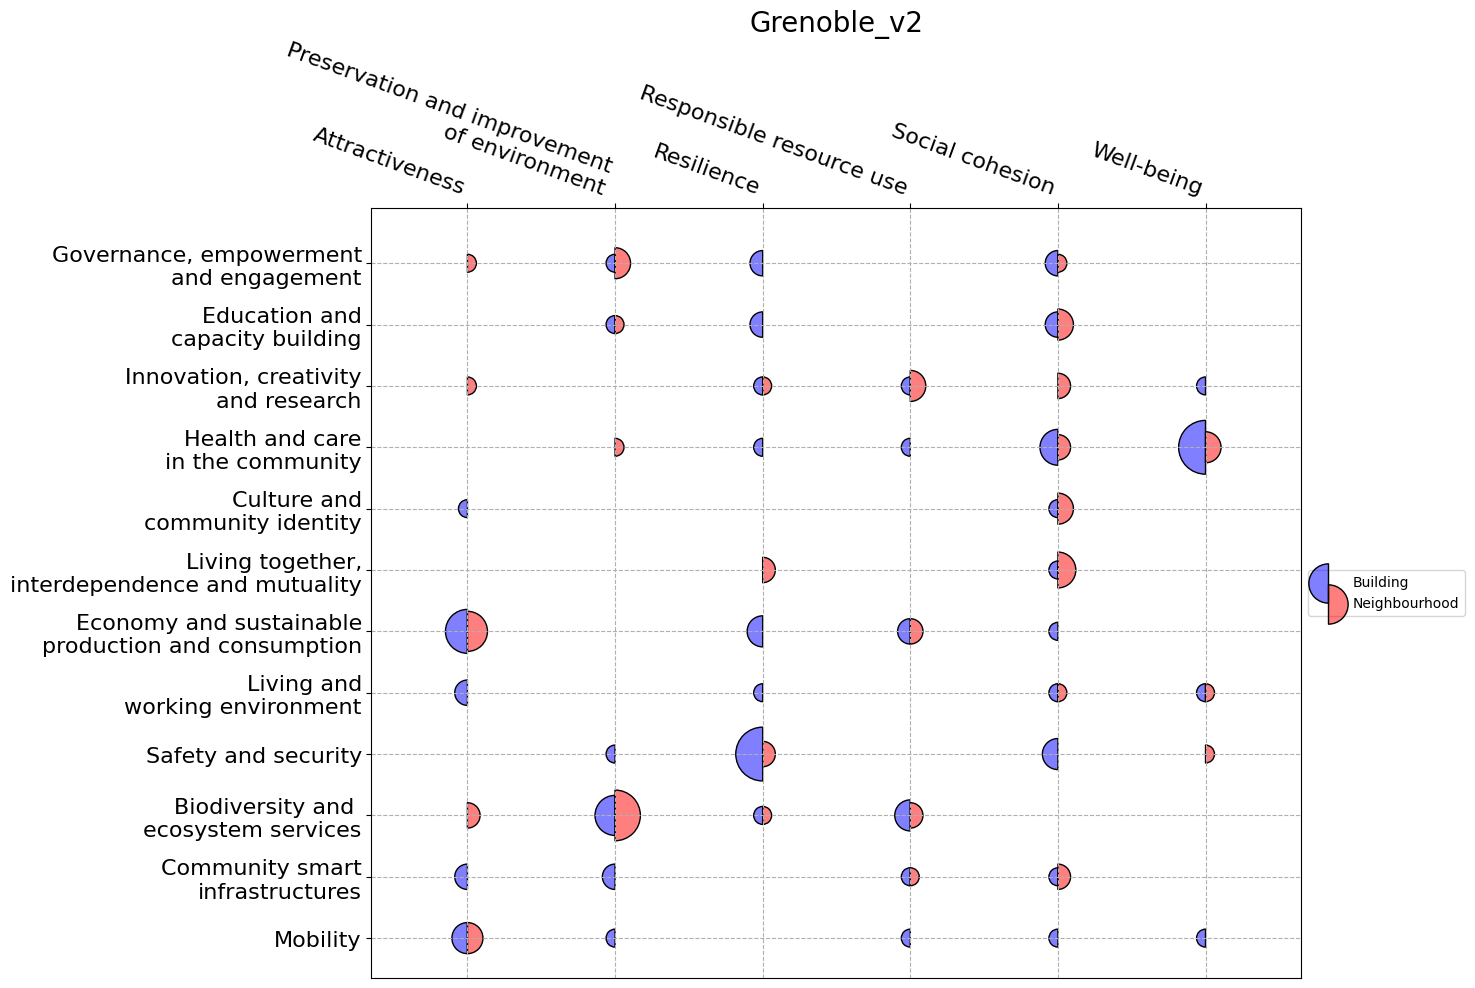

In [28]:
df = df[df.Place == "Grenoble_Batch2"]

dfRef = pd.DataFrame(columns=df.columns)
dfUC = df

plt, ax = iImg.createImg(dfUC,dfRef,title="Grenoble_v2")
plt.savefig("doc/WIP/Grenoble_v2.png", bbox_inches='tight')
plt.savefig("doc/WIP/Grenoble_v2.svg", bbox_inches='tight')

In [16]:
projets = pd.read_csv("data/bp_projets_gagnants.csv",sep=";")

# Create reports

In [31]:
df = pd.read_parquet("data/xls/db.parquet.gzip")
projets['hash'] = projets['Lien URL vers le projet lauréat'].apply(lambda x: str(hashlib.md5(x.encode("utf-8")).hexdigest()) )
txts.columns = ["hash","Source","long"]
print(len(txts),len(df))
projets_h = projets.merge(txts,on="hash",how="left")
print(len(projets_h))
projets_hh = projets_h.merge(df,on="Source",how="right")
print(len(projets_hh))

799 1759
799
1759


In [42]:
fp='data/budget-participatif_operations-projets-gagnants-realisations.geojson'
gdf = gpd.read_file(fp)
cols = list(gdf.columns)
cols[0] = "Identifiant du projet lauréat"
gdf.columns = cols
P = gdf.merge(projets_hh,on="Identifiant du projet lauréat",how="right")
print(list(P.columns))
P = P.sort_values(by="long").dropna(how= "any", axis=1).reset_index(drop=True)
print(len(P),"----",len(P.Source.unique()),"texts reviewed.")
print(list(P.columns))
P.to_parquet("data/dataset.parquet.gzip",compression="gzip")
P.head(3)

['Identifiant du projet lauréat', 'titre_operation', 'titre_projet_gagnant', 'edition', 'thematique', 'direction_pilote_operation', 'type_financement_operation', 'adresse_operation', 'arrondissement_operation', 'longitude', 'latitude', 'operation_q_pop', 'quartier_operation', 'avancement_operation', 'debut_etudes_operation', 'lancement_procedure_operation', 'lancement_travaux_operation', 'livraison_prev_operation', 'ouverture_operation', 'identifiant_projet_gagnant', 'lien_projet_soumis', 'lien_projet_gagnant', 'direction_pilote_projet', 'budget_global_projet_gagnant', 'echelle_bp', 'adresse_projet_gagnant', 'arrondissement_projet_gagnant', 'projet_q_pop', 'avancement_projet', 'debut_etudes_projet', 'lancement_procedure_projet', 'lancement_travaux_projet', 'livraison_prev_projet', 'ouverture_projet', 'derniere_mise_a_jour_donnees', 'geo_point_2d', 'geometry', 'Lien URL vers le projet soumis au vote', 'Lien URL vers le projet lauréat', 'Edition', 'Titre du projet lauréat', 'Thématique',

,Identifiant du projet lauréat,Lien URL vers le projet soumis au vote,Lien URL vers le projet lauréat,Edition,Thématique,Budget global du projet lauréat,Echelle du Budget participatif,Arrondissement du projet lauréat,Projet en Quartier populaire,Avancement du projet,...,Place,Type,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,3584,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,13000,Budget participatif d’arrondissement,75011,Oui,FIN,...,Paris,Activities,The proposal aims to enhance the social cohesi...,Social cohesion,"Living together, interdependence and mutuality",Building,4,Enhancing social cohesion through gatherings.,Renovation of playground with colorful ground ...,False
1,9955,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2021,Cadre de vie,60000,Budget participatif d’arrondissement,75015,Non,ETUDES,...,Paris,Activities,The project aims to enhance shared gardens and...,Attractiveness,Biodiversity and ecosystem services,Building,4,Creating green spaces with biodiversity.,"Revitalize shared gardens, add greenery.",False
2,9955,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2021,Cadre de vie,60000,Budget participatif d’arrondissement,75015,Non,ETUDES,...,Paris,Activities,The creation of green spaces and shared garden...,Social cohesion,Living and working environment,Building,3,Creating green spaces benefits community.,"Revitalize shared gardens, add greenery.",False


# Documents

In [4]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [3]:
import pandas as pd
import hashlib, os

In [7]:
df = pd.read_parquet("data/xls/db.parquet.gzip")
df["ID"] = df.Source.apply(lambda x: str(hashlib.md5(x.encode("utf-8")).hexdigest()))
IDS = list(df.ID.unique())
K = list(chunks(IDS, 10))
for k in range(len(K)):
    if not os.path.isfile("doc/WIP/Paris_"+str(k)+".xlsx"):
        DF = df[df.ID.isin(K[k])]
        createExcel(df,"doc/WIP/Paris_"+str(k)+".xlsx","Paris budget participatif","Paris","Review of the budget")
        print(k,"done")

/home/kelu/projets/pariso37k/venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


1 done


# Import and consolidate

In [ ]:
from src.impt import integrateReview

In [ ]:
path ="doc/WIP/.xlsx"
pdr = integrateReview(path)
pdr

NameError: name 'integrateReview' is not defined

In [1]:
import pandas as pd
import OAI

In [2]:
df = pd.read_parquet("data/xls/db.parquet.gzip")
df

,FromProbono,Origin,Place,Type,Source,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The text emphasizes the promotion of social co...,Social cohesion,Economy and sustainable production and consump...,Building,4,Promoting social cohesion through solidarity p...,Social project creating inclusive spaces.,False
1,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The project aims to create spaces for social i...,Social cohesion,Culture and community identity,Building,3,Create spaces for community interactions.,Social project creating inclusive spaces.,False
2,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The initiatives outlined in the project focus ...,Social cohesion,"Living together, interdependence and mutuality",Building,3,Community project promotes solidarity and incl...,Social project creating inclusive spaces.,False
3,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The text highlights the involvement of the loc...,Attractiveness,"Governance, empowerment and engagement",Building,4,Involvement of community in decision-making.,Coworking space in former station.,False
4,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The project aims to foster social cohesion by ...,Social cohesion,"Innovation, creativity and research",Neighbourhood,3,Promoting innovation in local community,Coworking space in former station.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The text describes a project aimed at restorin...,Preservation and improvement of environment,Living and working environment,Building,4,Restoring two fountains in Louvre-Opéra.,Restore iconic Parisian fountains elegantly.,False
1977,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the iconic bronze fountains...,Social cohesion,Culture and community identity,Neighbourhood,3,Restoration of iconic bronze fountains.,Restore iconic Parisian fountains elegantly.,False
1978,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the fountains and the impro...,Well-being,Health and care in the community,Building,2,Improving fountains benefits community well-being,Restore iconic Parisian fountains elegantly.,False
1979,False,BudgetParis,Paris,Activities,Le projet consiste à équiper des classes de 6 ...,The introduction of digital tools in elementar...,Attractiveness,"Innovation, creativity and research",Building,1,Digital tools improve elementary education.,Equipping schools with digital tools.,False


In [3]:
h = OAI.Helper("iso_ask", "./cache")
h.GOTOCACHE = "./cache/"

In [4]:
def shortSummary(x):
    return h.ask(
                    "Summarize in english the text below in up  to 5 words.",
                    x,
                    v="gpt-3.5-turbo",
                    ow=False,
                )


In [5]:
def longSummary(x):
    return h.ask(
                    "Summarize in english the text below in up to  5 sentences.",
                    x,
                    v="gpt-3.5-turbo",
                    ow=False,
                )


In [6]:
df.loc[df.Source_Title.str.len() > 100,"Source_Title"] = df.Source.apply(lambda x: shortSummary(x))


Processing with gpt-3.5-turbo :	 05/09/2024, 16:32:43 --> 05/09/2024, 16:32:46
Processing with gpt-3.5-turbo :	 05/09/2024, 16:32:47 --> 05/09/2024, 16:32:48
Processing with gpt-3.5-turbo :	 05/09/2024, 16:32:49 --> 05/09/2024, 16:32:50
Processing with gpt-3.5-turbo :	 05/09/2024, 16:32:52 --> 05/09/2024, 16:32:53
Processing with gpt-3.5-turbo :	 05/09/2024, 16:32:54 --> 05/09/2024, 16:32:55
Processing with gpt-3.5-turbo :	 05/09/2024, 16:32:55 --> 05/09/2024, 16:32:56


In [ ]:
SUMMARIES = [] 
for src in df.Source.unique():
    SUMMARIES.append([src,longSummary(src)])
SUMMARIES = pd.DataFrame(SUMMARIES,columns=["Source","SummaryEN"])

Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:48 --> 04/20/2024, 18:00:49
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:49 --> 04/20/2024, 18:00:49
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:49 --> 04/20/2024, 18:00:50
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:50 --> 04/20/2024, 18:00:50
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:50 --> 04/20/2024, 18:00:52
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:52 --> 04/20/2024, 18:00:52
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:52 --> 04/20/2024, 18:00:53
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:53 --> 04/20/2024, 18:00:53
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:54 --> 04/20/2024, 18:00:54
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:54 --> 04/20/2024, 18:00:55
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:55 --> 04/20/2024, 18:00:56
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:56 --> 04/20/2024, 18:00:56
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:5

In [ ]:
DF = df.merge(SUMMARIES,on="Source",how="left")
DF

,FromProbono,Origin,Place,Type,Source,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed,SummaryEN
0,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The text emphasizes the promotion of social co...,Social cohesion,Economy and sustainable production and consump...,Building,4,Promoting social cohesion through solidarity p...,Social project creating inclusive spaces.,False,Social project aims to create welcoming places...
1,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The project aims to create spaces for social i...,Social cohesion,Culture and community identity,Building,3,Create spaces for community interactions.,Social project creating inclusive spaces.,False,Social project aims to create welcoming places...
2,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The initiatives outlined in the project focus ...,Social cohesion,"Living together, interdependence and mutuality",Building,3,Community project promotes solidarity and incl...,Social project creating inclusive spaces.,False,Social project aims to create welcoming places...
3,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The text highlights the involvement of the loc...,Attractiveness,"Governance, empowerment and engagement",Building,4,Involvement of community in decision-making.,Coworking space in former station.,False,Opening coworking space at former train station.
4,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The project aims to foster social cohesion by ...,Social cohesion,"Innovation, creativity and research",Neighbourhood,3,Promoting innovation in local community,Coworking space in former station.,False,Opening coworking space at former train station.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The text describes a project aimed at restorin...,Preservation and improvement of environment,Living and working environment,Building,4,Restoring two fountains in Louvre-Opéra.,Restore iconic Parisian fountains elegantly.,False,"Restore, highlight, and illuminate historic fo..."
1755,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the iconic bronze fountains...,Social cohesion,Culture and community identity,Neighbourhood,3,Restoration of iconic bronze fountains.,Restore iconic Parisian fountains elegantly.,False,"Restore, highlight, and illuminate historic fo..."
1756,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the fountains and the impro...,Well-being,Health and care in the community,Building,2,Improving fountains benefits community well-being,Restore iconic Parisian fountains elegantly.,False,"Restore, highlight, and illuminate historic fo..."
1757,False,BudgetParis,Paris,Activities,Le projet consiste à équiper des classes de 6 ...,The introduction of digital tools in elementar...,Attractiveness,"Innovation, creativity and research",Building,1,Digital tools improve elementary education.,Equipping schools with digital tools.,False,Equipping schools with digital boards.


In [ ]:
DF.to_parquet("data/dataset_v2.parquet.gzip",compression="gzip")